In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
cur_path = "/content/drive/MyDrive/bigdatascaling/finalproject/MSE_Pearson/Final_result/"
os.chdir(cur_path)
!pwd

/content/drive/MyDrive/bigdatascaling/finalproject/MSE_Pearson/Final_result


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
def extract_start(string):
    return string[3:11]

In [5]:
benchmark = pd.read_csv('read_position_benchmark.csv')

p = [10, 50, 100, 300, 500, 1000]

In [10]:
filename = "final_result_k15_p1000.csv"
results = pd.read_csv(filename)

results['pred_start'] = results['reference'].astype(str).apply(extract_start)
result_compare = pd.concat([results, benchmark['reference_start']], axis=1).loc[:,['pred_start','reference_start']].astype(str)
result_compare = result_compare[result_compare['pred_start'].str.len() == 8].astype(int)

# Pearson
corr = np.corrcoef(result_compare['pred_start'], result_compare['reference_start'])[0,1]
print('Pearson: ',corr)

# MSE
y_true = result_compare['reference_start']
y_pred = result_compare['pred_start']
mse = mean_squared_error(y_true, y_pred)
print('MSE: ',mse)

Pearson:  0.9999971145120188
MSE:  896.5645


In [6]:
def calculate_evaluation(k):

  mse_list = []
  pearson_list = []

  for p in [10, 50, 100, 300, 500, 1000]:

    filename = f"final_result_k{k}_p{p}.csv"
    results = pd.read_csv(filename)

    results['pred_start'] = results['reference'].astype(str).apply(extract_start)
    result_compare = pd.concat([results, benchmark['reference_start']], axis=1).loc[:,['pred_start','reference_start']].astype(str)
    result_compare = result_compare[result_compare['pred_start'].str.len() == 8].astype(int)

    # Pearson
    corr = np.corrcoef(result_compare['pred_start'], result_compare['reference_start'])[0,1]
    pearson_list.append(corr)

    # MSE
    y_true = result_compare['reference_start']
    y_pred = result_compare['pred_start']
    mse = mean_squared_error(y_true, y_pred)
    mse_list.append(mse)

  return mse_list, pearson_list

In [7]:
mse_k1, pearson_k1 = calculate_evaluation(1)
mse_k3, pearson_k3 = calculate_evaluation(3)
mse_k5, pearson_k5 = calculate_evaluation(5)
mse_k10, pearson_k10 = calculate_evaluation(10)
mse_k15, pearson_k15 = calculate_evaluation(15)
mse_k20, pearson_k20 = calculate_evaluation(20)

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: 

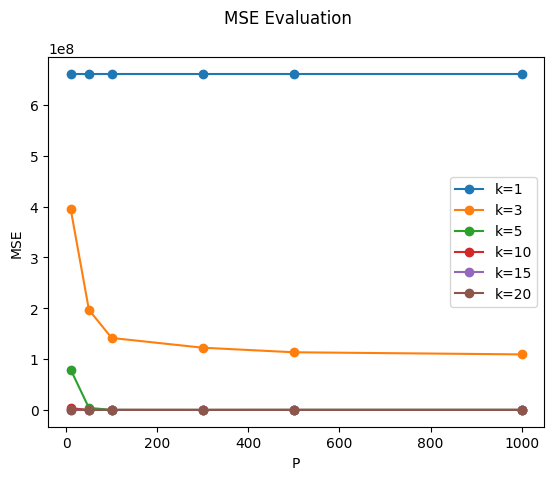

In [8]:
fig, ax = plt.subplots()

ax.plot(p, mse_k1, label='k=1', marker='o')
ax.plot(p, mse_k3, label='k=3', marker='o')
ax.plot(p, mse_k5, label='k=5', marker='o')
ax.plot(p, mse_k10, label='k=10', marker='o')
ax.plot(p, mse_k15, label='k=15', marker='o')
ax.plot(p, mse_k20, label='k=20', marker='o')
plt.suptitle('MSE Evaluation')
plt.xlabel('P')
plt.ylabel('MSE')
ax.legend()
plt.show()

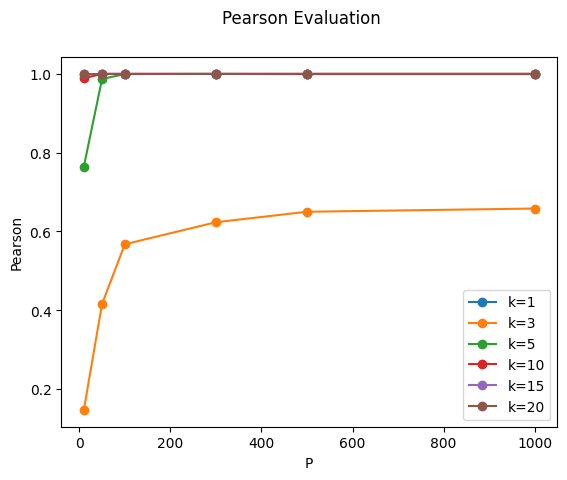

In [9]:
fig, ax = plt.subplots()

ax.plot(p, pearson_k1, label='k=1', marker='o')
ax.plot(p, pearson_k3, label='k=3', marker='o')
ax.plot(p, pearson_k5, label='k=5', marker='o')
ax.plot(p, pearson_k10, label='k=10', marker='o')
ax.plot(p, pearson_k15, label='k=15', marker='o')
ax.plot(p, pearson_k20, label='k=20', marker='o')
plt.suptitle('Pearson Evaluation')
plt.xlabel('P')
plt.ylabel('Pearson')
ax.legend()
plt.show()